#**Sentimen Analisis Review Instagram melalui Play Store**

##Paulina Hambali - MC009D5X2419

##**Import Library**

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import csv
import requests
from io import StringIO

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud


In [2]:
import nltk
nltk.download('punkt_tab')
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


##**Loading Dataset**

In [3]:
#Load-Dataset
df = pd.read_csv('ulasan_instagram.csv')
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,1a2eb812-68f3-44b6-8ac0-13e1d9c9696b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Mudah refresh terus, foto yg dilihat langsung ...",1,0,215.0.0.27.359,2021-12-09 18:48:35,NaN,NaN,215.0.0.27.359
1,3006c0ce-5fbf-4cac-b320-67c33e55cf20,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Setelah update malah banyak bug. Di story tuli...,1,0,167.1.0.25.120,2023-11-26 16:09:49,NaN,NaN,167.1.0.25.120
2,6f4fe7d4-dd6a-4897-a5b9-936d8b6a69dd,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Banyak bug nya dan sampe sekarang belum diperb...,1,8,185.0.0.38.116,2021-05-01 21:57:15,NaN,NaN,185.0.0.38.116
3,feff9af7-f134-4f9b-8e76-b80cebe29505,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"assalamu'alaikum kak, aku pengguna Instragram,...",5,4654,372.0.0.48.60,2025-03-20 19:14:02,NaN,NaN,372.0.0.48.60
4,18926018-e84c-4a48-8796-554df29c2d96,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Instagram makin kesini makin bagus tapi tolong...,5,3239,372.0.0.48.60,2025-03-22 22:40:20,NaN,NaN,372.0.0.48.60


In [4]:
#InformasiDataset:df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31500 entries, 0 to 31499
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reviewId              31500 non-null  object 
 1   userName              31500 non-null  object 
 2   userImage             31500 non-null  object 
 3   content               31500 non-null  object 
 4   score                 31500 non-null  int64  
 5   thumbsUpCount         31500 non-null  int64  
 6   reviewCreatedVersion  26661 non-null  object 
 7   at                    31500 non-null  object 
 8   replyContent          0 non-null      float64
 9   repliedAt             0 non-null      float64
 10  appVersion            26661 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 2.6+ MB


In [5]:
#DropDataNull: replycontent and repliedat == 0 data
df = df.drop(['replyContent','repliedAt'], axis=1)

In [6]:
#CheckDuplicate
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
31495,False
31496,False
31497,False
31498,False


In [7]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,1a2eb812-68f3-44b6-8ac0-13e1d9c9696b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Mudah refresh terus, foto yg dilihat langsung ...",1,0,215.0.0.27.359,2021-12-09 18:48:35,215.0.0.27.359
1,3006c0ce-5fbf-4cac-b320-67c33e55cf20,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Setelah update malah banyak bug. Di story tuli...,1,0,167.1.0.25.120,2023-11-26 16:09:49,167.1.0.25.120
2,6f4fe7d4-dd6a-4897-a5b9-936d8b6a69dd,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Banyak bug nya dan sampe sekarang belum diperb...,1,8,185.0.0.38.116,2021-05-01 21:57:15,185.0.0.38.116
3,feff9af7-f134-4f9b-8e76-b80cebe29505,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"assalamu'alaikum kak, aku pengguna Instragram,...",5,4654,372.0.0.48.60,2025-03-20 19:14:02,372.0.0.48.60
4,18926018-e84c-4a48-8796-554df29c2d96,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Instagram makin kesini makin bagus tapi tolong...,5,3239,372.0.0.48.60,2025-03-22 22:40:20,372.0.0.48.60


##**PreprocessingData**


In [8]:
#Function in PreprocessingData
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#[A-Za-z0-9]+', '', text)
    text = re.sub(r'RT[\s]', '', text)
    text = re.sub(r"http\S+", '', text)
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'[^\w\s]', '', text)

    text = text.replace('\n', ' ')
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip(' ')
    return text

def casefoldingText(text):
    text = text.lower()
    return text

def tokenizingText(text):
    text = word_tokenize(text)
    return text

def filteringText(text):
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])

    filtered = [txt for txt in text if txt not in listStopwords]
    return filtered

def stemmingText(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    stemmed_text = ' '.join(stemmed_words)
    return stemmed_text

def toSentence(list_words):
    sentence = ' '.join(word for word in list_words)
    return sentence


In [9]:
#Tokenisasi content in df
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
df['tokenized'] = df['content'].apply(lambda x: word_tokenize(x.lower()))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
#Dictionary-Slangwords
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [11]:
#reviewdf
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,tokenized
0,1a2eb812-68f3-44b6-8ac0-13e1d9c9696b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Mudah refresh terus, foto yg dilihat langsung ...",1,0,215.0.0.27.359,2021-12-09 18:48:35,215.0.0.27.359,"[mudah, refresh, terus, ,, foto, yg, dilihat, ..."
1,3006c0ce-5fbf-4cac-b320-67c33e55cf20,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Setelah update malah banyak bug. Di story tuli...,1,0,167.1.0.25.120,2023-11-26 16:09:49,167.1.0.25.120,"[setelah, update, malah, banyak, bug, ., di, s..."
2,6f4fe7d4-dd6a-4897-a5b9-936d8b6a69dd,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Banyak bug nya dan sampe sekarang belum diperb...,1,8,185.0.0.38.116,2021-05-01 21:57:15,185.0.0.38.116,"[banyak, bug, nya, dan, sampe, sekarang, belum..."
3,feff9af7-f134-4f9b-8e76-b80cebe29505,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"assalamu'alaikum kak, aku pengguna Instragram,...",5,4654,372.0.0.48.60,2025-03-20 19:14:02,372.0.0.48.60,"[assalamu'alaikum, kak, ,, aku, pengguna, inst..."
4,18926018-e84c-4a48-8796-554df29c2d96,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Instagram makin kesini makin bagus tapi tolong...,5,3239,372.0.0.48.60,2025-03-22 22:40:20,372.0.0.48.60,"[instagram, makin, kesini, makin, bagus, tapi,..."
...,...,...,...,...,...,...,...,...,...,...
31495,c307c56f-abc3-4c46-9a78-6852fb4f2dad,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Sekarang tiap saya foto dari story instagram d...,1,2,210.0.0.28.71,2021-10-26 12:05:23,210.0.0.28.71,"[sekarang, tiap, saya, foto, dari, story, inst..."
31496,0c7a207f-74ff-4c37-a2aa-54c4304909da,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,ko ig sekarang ribet banyak masalah dari siste...,4,1,114.0.0.38.120,2019-10-09 12:50:36,114.0.0.38.120,"[ko, ig, sekarang, ribet, banyak, masalah, dar..."
31497,c6d6d7ea-0b9c-47f5-9455-60df7940a351,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,gak bisa login.. ada yg aneh .. kenapa ni mula...,5,0,203.0.0.29.118,2022-05-25 06:46:33,203.0.0.29.118,"[gak, bisa, login, .., ada, yg, aneh, .., kena..."
31498,9f411efe-5fca-4b35-8391-50d0127f3a66,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Ini kenapa ya ko bnya bug sii mau cht sama orn...,2,1,241.1.0.18.114,2022-07-05 18:35:17,241.1.0.18.114,"[ini, kenapa, ya, ko, bnya, bug, sii, mau, cht..."


##**Pelabelan**

In [12]:
# Loads positive lexicon and negative lexicon data from GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')

    for row in reader:
        lexicon_positive[row[0]] = int(row[1])
else:
    print("Failed to fetch positive lexicon data")

lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')

    for row in reader:
        lexicon_negative[row[0]] = int(row[1])
else:
    print("Failed to fetch negative lexicon data")

In [13]:
#Analisis sentimen - lexicon bahasa
def sentiment_analysis_lexicon_indonesia(text):
    score = 0

    for word in text:
        if word in lexicon_positive:
            score += lexicon_positive[word]

    for word in text:
        if word in lexicon_negative:
            score += lexicon_negative[word]

    if score > 0:
        polarity = 'positive'
    elif score < 0:
        polarity = 'negative'
    else:
        polarity = 'neutral'

    return score, polarity

In [14]:
#Polarityscore
if 'content' in df.columns:
    results = df['tokenized'].apply(sentiment_analysis_lexicon_indonesia)
    results = list(zip(*results))

    df['polarity_score'] = results[0]
    df['polarity'] = results[1]

    # Menampilkan distribusi kategori sentimen
    print(df['polarity'].value_counts())
else:
    print("Kolom 'content' tidak ditemukan dalam DataFrame.")

polarity
negative    24387
positive     5989
neutral      1124
Name: count, dtype: int64


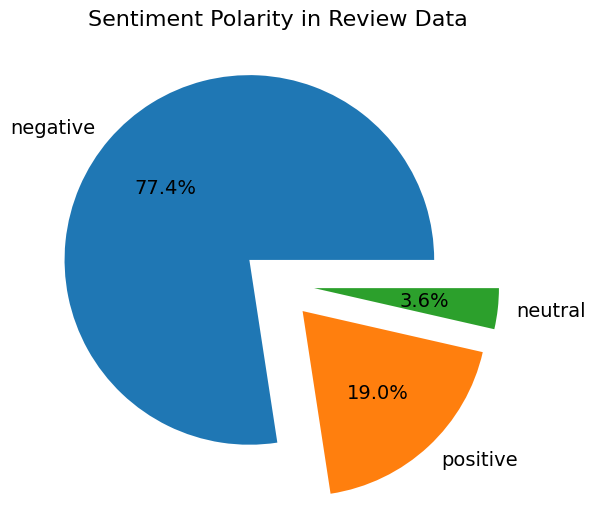

In [15]:
#PieChart of instagram review
fig, ax = plt.subplots(figsize=(6, 6))
sizes = [count for count in df['polarity'].value_counts()]
labels = list(df['polarity'].value_counts().index)
explode = (0.2,) * len(labels)
ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 14})
ax.set_title('Sentiment Polarity in Review Data', fontsize=16, pad=20)
plt.show()


In [16]:
#FilteringPositiveReview
pd.set_option('display.max_colwidth', 3000)
positive_review = df[df['polarity'] == 'positive']
positive_review = positive_review[['polarity_score', 'polarity']]
positive_review = positive_review.sort_values(by='polarity_score', ascending=False)
positive_review = positive_review.reset_index(drop=True)
positive_review.index += 1

In [17]:
#FilteringNegativeReview
pd.set_option('display.max_colwidth', 3000)
negative_review = df[df['polarity'] == 'negative']
negative_review = negative_review[['polarity_score', 'polarity']]
negative_review = negative_review.sort_values(by='polarity_score', ascending=True)
negative_review = negative_review[0:10]
negative_review = negative_review.reset_index(drop=True)
negative_review.index += 1

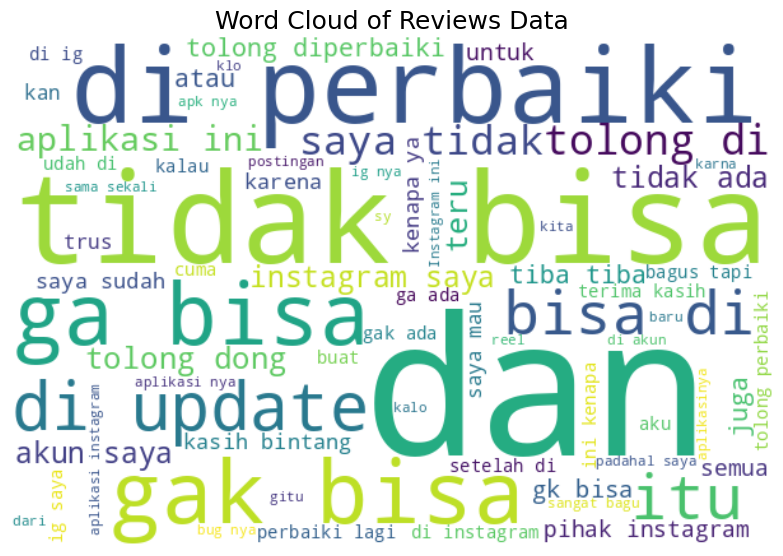

In [18]:
#WordCloud-ReviewData
from wordcloud import WordCloud, STOPWORDS

list_words = ' '.join([word for review in df['content'] for word in review.split()])
wordcloud = WordCloud(width=600, height=400, background_color='white',
                      min_font_size=10, stopwords=STOPWORDS).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Reviews Data', fontsize=18)
ax.grid(False)
ax.imshow(wordcloud, interpolation='bilinear')
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

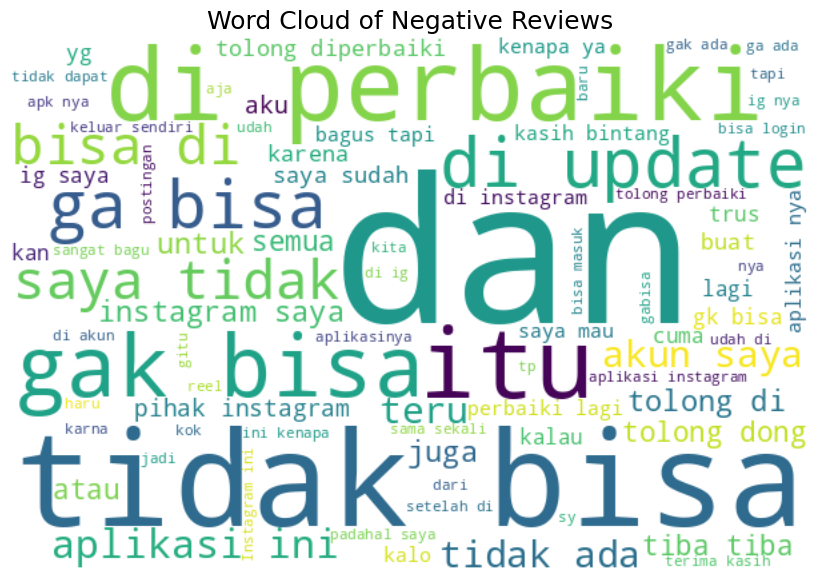

In [19]:
#WordCloud-NegativeReview
from wordcloud import WordCloud, STOPWORDS

negative_text = df[df['polarity'] == 'negative']['content'].astype(str)
list_words = ' '.join(negative_text.str.cat(sep=' ').split())
wordcloud = WordCloud(width=600, height=400, background_color='white',
                      min_font_size=10, stopwords=STOPWORDS).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Negative Reviews', fontsize=18)
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')
plt.tight_layout(pad=0)
plt.show()


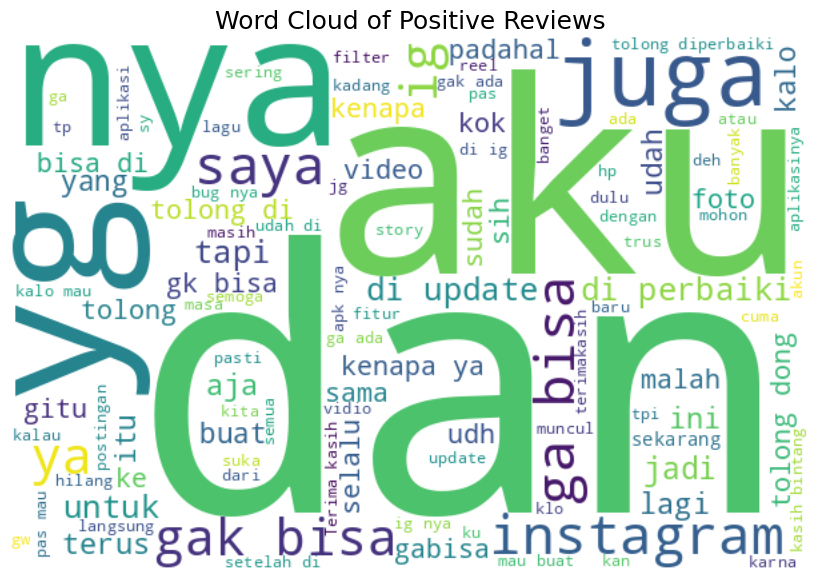

In [20]:
#WordCloud-PositiveReview
from wordcloud import WordCloud, STOPWORDS

positive_text = df[df['polarity'] == 'positive']['content'].astype(str)
list_words = ' '.join(positive_text.str.cat(sep=' ').split())
wordcloud = WordCloud(width=600, height=400, background_color='white',
                      min_font_size=10, stopwords=STOPWORDS).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Positive Reviews', fontsize=18)
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')
plt.tight_layout(pad=0)
plt.show()


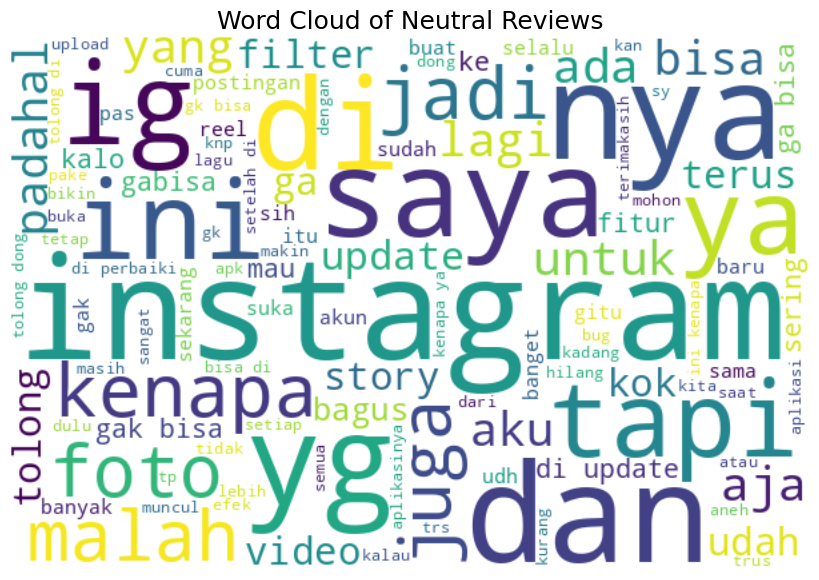

In [21]:
#WordCloud-NeutralReview
from wordcloud import WordCloud, STOPWORDS

neutral_text = df[df['polarity'] == 'neutral']['content'].astype(str)
list_words = ' '.join(neutral_text.str.cat(sep=' ').split())
wordcloud = WordCloud(width=600, height=400, background_color='white',
                      min_font_size=10, stopwords=STOPWORDS).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Neutral Reviews', fontsize=18)
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')
plt.tight_layout(pad=0)
plt.show()

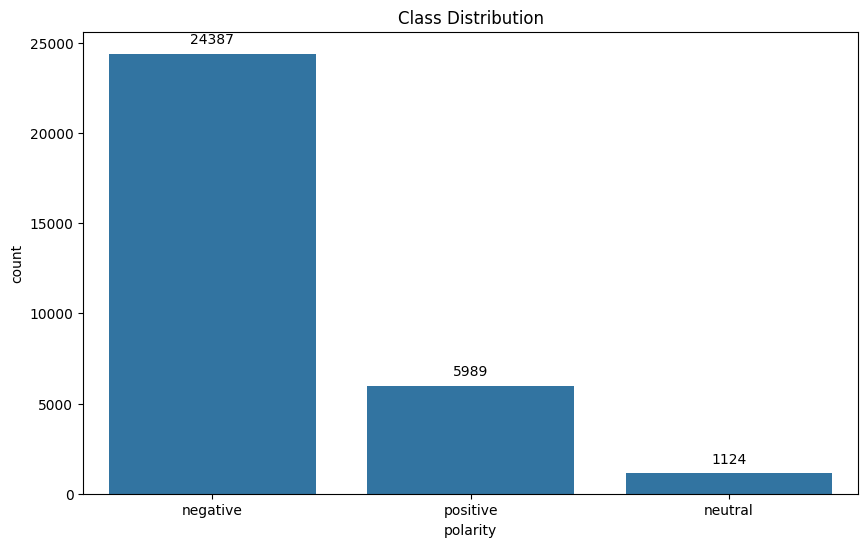

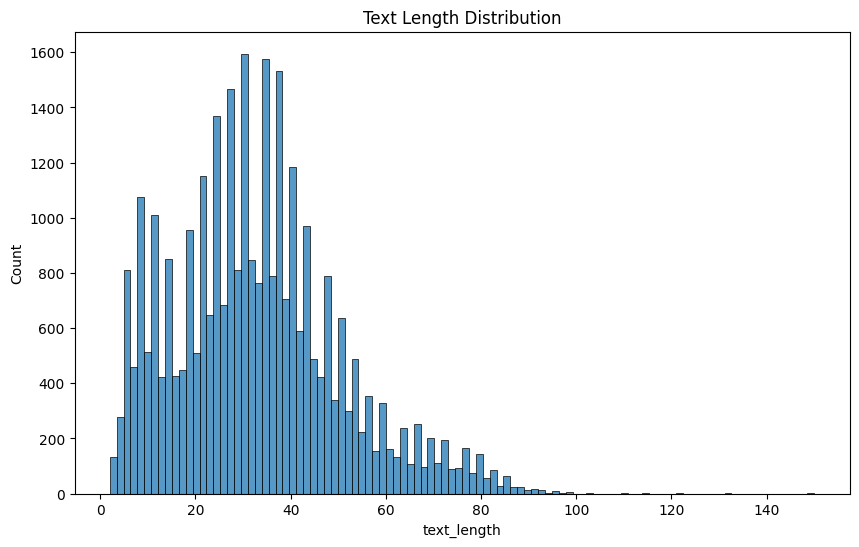

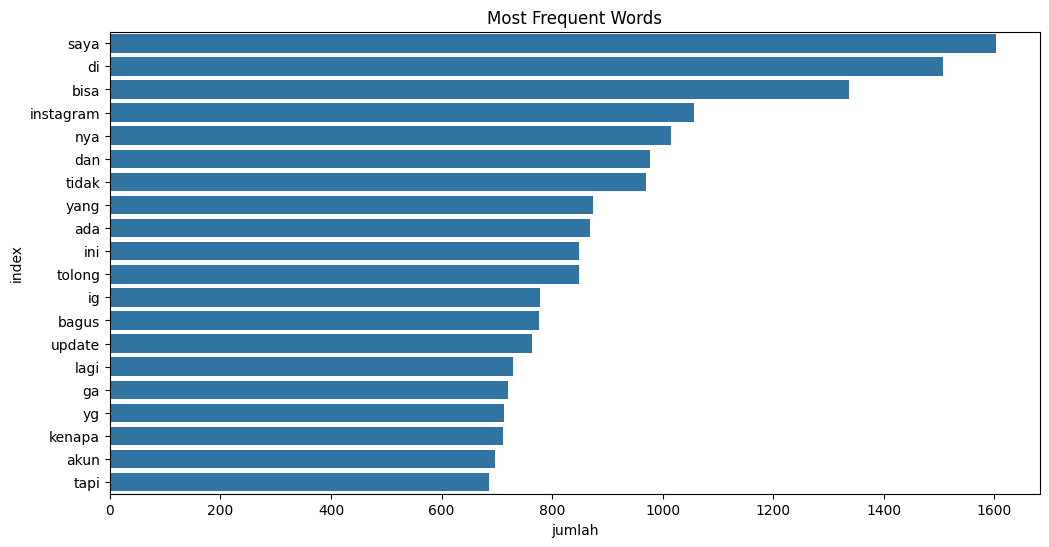

In [22]:
#Visualisasi Distribusi Kata
from sklearn.feature_extraction.text import TfidfVectorizer

#Class Distribution
plt.figure(figsize=(10, 6))
class_dist_plot = sns.countplot(x='polarity', data=df)
plt.title('Class Distribution')
for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),
                             (p.get_x() + p.get_width() / 2., p.get_height()),
                             ha='center', va='center',
                             xytext=(0, 10),
                             textcoords='offset points')
plt.show()

#TextLength Distribution
plt.figure(figsize=(10, 6))
df['text_length'] = df['content'].astype(str).apply(lambda x: len(x.split()))
sns.histplot(df['text_length'])
plt.title('Text Length Distribution')
plt.show()

#MostFrequent
plt.figure(figsize=(12, 6))
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['content'].astype(str))
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Most Frequent Words')
plt.show()


In [23]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score

##**Data Spliting**

In [24]:
#Descdata
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,tokenized,polarity_score,polarity,text_length
0,1a2eb812-68f3-44b6-8ac0-13e1d9c9696b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Mudah refresh terus, foto yg dilihat langsung hilang kebawah.. . Nyari jadi susah.. upload video juga susah. Padahal koneksi internet cepat dan stabil. 😕 - sering buffering dan bahkan saat nulis panjang"" instagram not response. Closed. then hilang semua updaye pembaruan : ""tidak dapat memuat ulang kabar beranda""",1,0,215.0.0.27.359,2021-12-09 18:48:35,215.0.0.27.359,"[mudah, refresh, terus, ,, foto, yg, dilihat, langsung, hilang, kebawah, .., ., nyari, jadi, susah, .., upload, video, juga, susah, ., padahal, koneksi, internet, cepat, dan, stabil, ., 😕, -, sering, buffering, dan, bahkan, saat, nulis, panjang, '', instagram, not, response, ., closed, ., then, hilang, semua, updaye, pembaruan, :, ``, tidak, dapat, memuat, ulang, kabar, beranda, '']",-4,negative,48
1,3006c0ce-5fbf-4cac-b320-67c33e55cf20,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Setelah update malah banyak bug. Di story tulisan nya ""musik tidak di temukan"" Semua story orang yang pakai musik, di saya itu tulisan nya "" musik tidak tersedia"" udah segala cara di coba.ga ada yang bisaa.. semua alasan sama, katanya wilayah wilayah. Serumah aja dia aman ig nya, kenapa saya bermasalah? Uninstall berkali kali, logout login, update. Semuanya udah. Makin kesini kenapa sih.. respon dong tolong!",1,0,167.1.0.25.120,2023-11-26 16:09:49,167.1.0.25.120,"[setelah, update, malah, banyak, bug, ., di, story, tulisan, nya, ``, musik, tidak, di, temukan, '', semua, story, orang, yang, pakai, musik, ,, di, saya, itu, tulisan, nya, ``, musik, tidak, tersedia, '', udah, segala, cara, di, coba.ga, ada, yang, bisaa, .., semua, alasan, sama, ,, katanya, wilayah, wilayah, ., serumah, aja, dia, aman, ig, nya, ,, kenapa, saya, bermasalah, ?, uninstall, berkali, kali, ,, logout, login, ,, update, ., semuanya, udah, ., makin, kesini, kenapa, sih, .., respon, dong, tolong, !]",-21,negative,66
2,6f4fe7d4-dd6a-4897-a5b9-936d8b6a69dd,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Banyak bug nya dan sampe sekarang belum diperbaiki, padahal udh report ke bagian CS nya, dan masi belum ada perubahan, bug yang aku temui berupa - beberapa fitur update terbaru tidak ada tombolnya (gaada tombol reply di dm dll) - terkadang instagram saya putih dan tidak keliatan tulisan apapun (kecuali gambar postingannya sendiri) - dll masi banyak banget, yg diatas itu yg paling ngeselin si. P.s system algorithm nya kaya kontool, akun / bisnis kecil susah berkembang. Sekian sahabat",1,8,185.0.0.38.116,2021-05-01 21:57:15,185.0.0.38.116,"[banyak, bug, nya, dan, sampe, sekarang, belum, diperbaiki, ,, padahal, udh, report, ke, bagian, cs, nya, ,, dan, masi, belum, ada, perubahan, ,, bug, yang, aku, temui, berupa, -, beberapa, fitur, update, terbaru, tidak, ada, tombolnya, (, gaada, tombol, reply, di, dm, dll, ), -, terkadang, instagram, saya, putih, dan, tidak, keliatan, tulisan, apapun, (, kecuali, gambar, postingannya, sendiri, ), -, dll, masi, banyak, banget, ,, yg, diatas, itu, yg, paling, ngeselin, si, ., p.s, system, algorithm, nya, kaya, kontool, ,, akun, /, bisnis, kecil, susah, berkembang, ., sekian, sahabat]",-25,negative,79
3,feff9af7-f134-4f9b-8e76-b80cebe29505,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"assalamu'alaikum kak, aku pengguna Instragram, aku sudah sangat puas sekali dengan menggunakan Instragram aplikasi nya sangat keren dan wah bangt, untuk komunikasi udah sangat good, nah jadi aku mau itu kak tolong perbarui i

In [25]:
#Fitur(review) dan label(sentimen)
X = df['content']
y = df['polarity']

In [26]:
#Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8)
X_tfidf = tfidf.fit_transform(X)

In [27]:
#feature_df
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())
features_df.head()

,ada,agar,aja,aku,akun,aneh,apa,apk,aplikasi,aplikasinya,...,ulang,untuk,update,upload,versi,video,vidio,ya,yang,yg
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.222495,0.000000,0.000000,0.213664,0.0,0.171338,0.0,0.0,0.000000,0.143445
1,0.080447,0.000000,0.103327,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.181093,0.000000,0.0,0.000000,0.0,0.0,0.168493,0.000000
2,0.204498,0.000000,0.000000,0.149431,0.129313,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.115086,0.000000,0.0,0.000000,0.0,0.0,0.107079,0.237152
3,0.076823,0.158086,0.000000,0.336816,0.000000,0.0,0.0,0.0,0.094283,0.0,...,0.000000,0.100091,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.160903,0.000000
4,0.129026,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000


In [28]:
#Labeling xy
from sklearn.model_selection import train_test_split

y = df['polarity']
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


##**Pemodelan**


### **Naive-Bayes**

In [29]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

naive_bayes = BernoulliNB()
naive_bayes.fit(X_train.toarray(), y_train)
y_pred_train_nb = naive_bayes.predict(X_train.toarray())
y_pred_test_nb = naive_bayes.predict(X_test.toarray())
accuracy_train_nb = accuracy_score(y_train, y_pred_train_nb)
accuracy_test_nb = accuracy_score(y_test, y_pred_test_nb)
print('Naive Bayes - accuracy_train:', accuracy_train_nb)
print('Naive Bayes - accuracy_test:', accuracy_test_nb)

Naive Bayes - accuracy_train: 0.7389682539682539
Naive Bayes - accuracy_test: 0.729047619047619


### **Random-Forest**

In [30]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(X_train.toarray(), y_train)
y_pred_train_rf = random_forest.predict(X_train.toarray())
y_pred_test_rf = random_forest.predict(X_test.toarray())

accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)

print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

Random Forest - accuracy_train: 0.9955952380952381
Random Forest - accuracy_test: 0.8174603174603174


### **LogisticRegression**

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df_binary = df[df['polarity'].isin(['positive', 'negative'])]

X = df_binary['content']
y = df_binary['polarity']
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8)
X_tfidf = tfidf.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)

logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(X_train, y_train)

y_pred_train_lr = logistic_regression.predict(X_train)
y_pred_test_lr = logistic_regression.predict(X_test)

accuracy_train_lr = accuracy_score(y_train, y_pred_train_lr)
accuracy_test_lr = accuracy_score(y_test, y_pred_test_lr)

print('Logistic Regression - accuracy_train:', accuracy_train_lr)
print('Logistic Regression - accuracy_test:', accuracy_test_lr)


Logistic Regression - accuracy_train: 0.8913168724279835
Logistic Regression - accuracy_test: 0.8898946675444371


### **Decision-Tree**

In [32]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train.toarray(), y_train)
y_pred_train_dt = decision_tree.predict(X_train.toarray())
y_pred_test_dt = decision_tree.predict(X_test.toarray())

accuracy_train_dt = accuracy_score(y_pred_train_dt, y_train)
accuracy_test_dt = accuracy_score(y_pred_test_dt, y_test)

print('Decision Tree - accuracy_train:', accuracy_train_dt)
print('Decision Tree - accuracy_test:', accuracy_test_dt)

Decision Tree - accuracy_train: 0.9967489711934157
Decision Tree - accuracy_test: 0.7955892034233049


### **Hasil Akurasi Model-Model**

In [33]:
results_df = pd.DataFrame({
    'Model': ['Naive Bayes', 'Random Forest', 'Logistic Regression', 'Decision Tree'],
    'Accuracy Train': [accuracy_train_nb, accuracy_train_rf, accuracy_train_lr, accuracy_train_dt],
    'Accuracy Test': [accuracy_test_nb, accuracy_test_rf, accuracy_test_lr, accuracy_test_dt]
})
accuracy_test_only = results_df[['Model', 'Accuracy Test']]
print(accuracy_test_only)


                 Model  Accuracy Test
0          Naive Bayes       0.729048
1        Random Forest       0.817460
2  Logistic Regression       0.889895
3        Decision Tree       0.795589


Dalam sentimen analisis review dari aplikasi instagram, didapatkan hasil **accuracy test** dari beberapa model, yakni
* Naive-Bayes = 72.90%
* Random-Forest = 81.74%
* Logistic-Regression = 88.98%    **--> accuracy test tertinggi** (minimal 85%)
* Decision-Tree = 79.55%

Dari data accuracy test diatas, disimpulan algoritma logistic regression mencapai akurasi tertinggi yakni 88,6%. Oleh karena itu, algoritma logistic regression dipilih menjadi model utama yang akan digunakan untuk memprediksi sentimen pada kalimat-kalimat baru.

In [36]:
#Kalimat baru-Contoh Negative
kalimat_baru = input("Masukkan kalimat baru: ")
kalimat_baru_cleaned = cleaningText(kalimat_baru)
kalimat_baru_casefolded = casefoldingText(kalimat_baru_cleaned)
kalimat_baru_slangfixed = fix_slangwords(kalimat_baru_casefolded)
kalimat_baru_tokenized = tokenizingText(kalimat_baru_slangfixed)
kalimat_baru_filtered = filteringText(kalimat_baru_tokenized)
kalimat_baru_final = toSentence(kalimat_baru_filtered)
X_kalimat_baru = tfidf.transform([kalimat_baru_final])

prediksi_sentimen = logistic_regression.predict(X_kalimat_baru)

if prediksi_sentimen[0] == 'positive':
    print("Sentimen kalimat baru adalah POSITIF.")
else:
    print("Sentimen kalimat baru adalah NEGATIF.")

Masukkan kalimat baru: instagram navigasinya jelek
Sentimen kalimat baru adalah NEGATIF.


In [37]:
#Kalimat baru-Contoh Positive
kalimat_baru = input("Masukkan kalimat baru: ")
kalimat_baru_cleaned = cleaningText(kalimat_baru)
kalimat_baru_casefolded = casefoldingText(kalimat_baru_cleaned)
kalimat_baru_slangfixed = fix_slangwords(kalimat_baru_casefolded)
kalimat_baru_tokenized = tokenizingText(kalimat_baru_slangfixed)
kalimat_baru_filtered = filteringText(kalimat_baru_tokenized)
kalimat_baru_final = toSentence(kalimat_baru_filtered)
X_kalimat_baru = tfidf.transform([kalimat_baru_final])

prediksi_sentimen = logistic_regression.predict(X_kalimat_baru)

if prediksi_sentimen[0] == 'positive':
    print("Sentimen kalimat baru adalah POSITIF.")
else:
    print("Sentimen kalimat baru adalah NEGATIF.")

Masukkan kalimat baru: saya suka tampilan ui/ux instagram
Sentimen kalimat baru adalah POSITIF.
